In [1]:
import soil
import networkx as nx
 
%load_ext autoreload
%autoreload 2

# To display plots in the notebook

In [2]:
%matplotlib inline

from soil import *

# News Spreading example with SOIL

In this example we three different kinds of models, which we combine in five types of simulation

In [3]:
!cat NewsSpread.yml

---
default_state: {}
load_module: newsspread
environment_agents: []
environment_params:
  prob_neighbor_spread: 0.0
  prob_tv_spread: 0.01
interval: 1
max_time: 300
name: Sim_all_dumb
network_agents:
- agent_class: DumbViewer
  state:
    has_tv: false
  weight: 1
- agent_class: DumbViewer
  state:
    has_tv: true
  weight: 1
network_params:
  generator: barabasi_albert_graph
  n: 500
  m: 5
num_trials: 50
---
default_state: {}
load_module: newsspread
environment_agents: []
environment_params:
  prob_neighbor_spread: 0.0
  prob_tv_spread: 0.01
interval: 1
max_time: 300
name: Sim_half_herd
network_agents:
- agent_class: DumbViewer
  state:
    has_tv: false
  weight: 1
- agent_class: DumbViewer
  state:
    has_tv: true
  weight: 1
- agent_class: HerdViewer
  state:
    has_tv: false
  weight: 1
- agent_class: HerdViewer
  state:
    has_tv: true
  weight: 1
network_params:
  generator: barabasi_albert_graph
  n: 500
  m: 5
num_trials: 50
---
default_state: {}
load_module: newsspread


In [4]:
evodumb = analysis.read_data('soil_output/Sim_all_dumb/', process=analysis.get_count, group=True, keys=['id']);

ValueError: No objects to concatenate

In [23]:
evodumb['mean']

id            
         infected     neutral
t_step                       
0        2.120000  497.880000
1        4.938776  495.061224
2        7.468085  492.531915
3       10.333333  489.666667
4       12.191489  487.808511
5       14.680851  485.319149
6       17.377778  482.622222
7       20.000000  480.000000
8       22.212766  477.787234
9       24.046512  475.953488
10      26.809524  473.190476
11      29.418605  470.581395
12      31.777778  468.222222
13      33.666667  466.333333
14      36.113636  463.886364
15      36.976190  463.023810
16      40.113636  459.886364
17      41.872340  458.127660
18      44.550000  455.450000
19      45.418605  454.581395
20      47.666667  452.333333
21      48.738095  451.261905
22      51.731707  448.268293
23      54.390244  445.609756
24      56.116279  443.883721
25      58.404762  441.595238
26      58.976744  441.023256
27      61.522727  438.477273
28      63.263158  436.736842
29      65.090909  434.909091

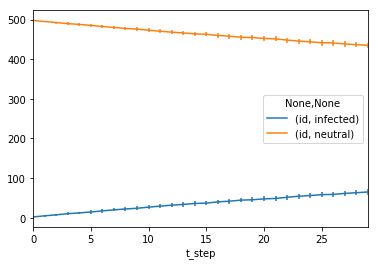

In [24]:
evodumb['mean'].plot(yerr=evodumb['std'])

In [25]:
evodumb = analysis.read_data('soil_output/Sim_all_dumb/', group=True, process=analysis.get_count, keys=['id']);
evohalfherd = analysis.read_data('soil_output/Sim_half_herd/', group=True, process=analysis.get_count, keys=['id'])
evoherd = analysis.read_data('soil_output/Sim_all_herd/', group=True, process=analysis.get_count, keys=['id'])
evoherdwise = analysis.read_data('soil_output/Sim_wise_herd/', group=True, process=analysis.get_count, keys=['id'])
evowise = analysis.read_data('soil_output/Sim_all_wise/', group=True, process=analysis.get_count, keys=['id'])

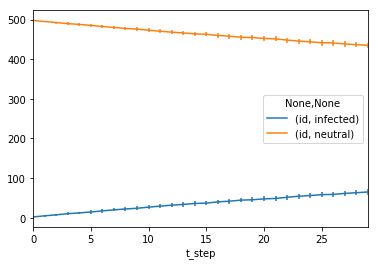

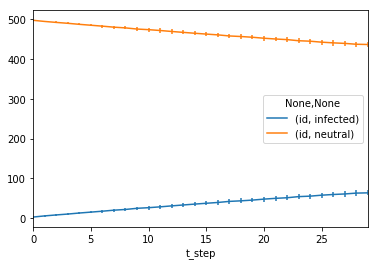

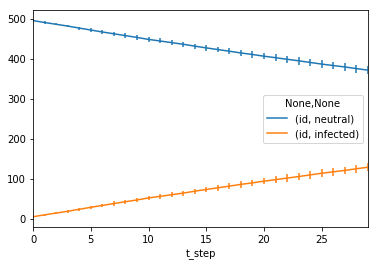

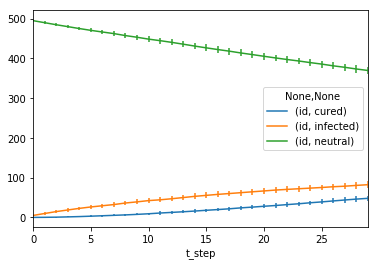

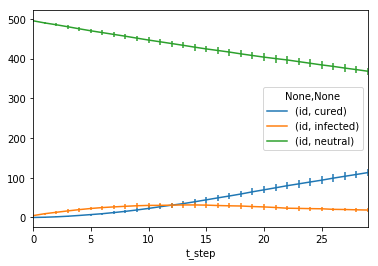

In [26]:
for i in [evodumb, evohalfherd, evoherd, evoherdwise, evowise]:
    i['mean'].plot(yerr=i['std'])

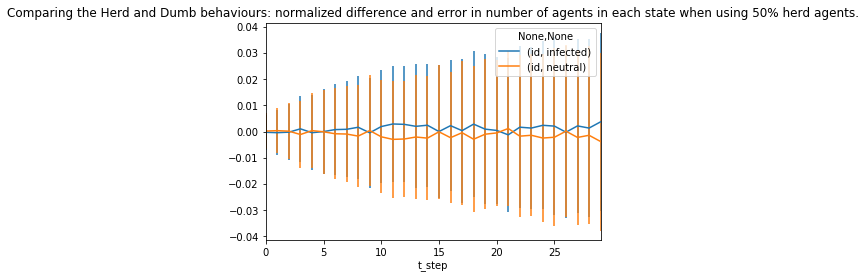

In [27]:
diff = evodumb['mean']-evohalfherd['mean']
m = evodumb['max'].loc[0].sum()
diff = diff / m
diff.plot(yerr=(evodumb['std']+evoherd['std'])/m,
          title='Comparing the Herd and Dumb behaviours: normalized difference and error in number of agents in each state when using 50% herd agents.');

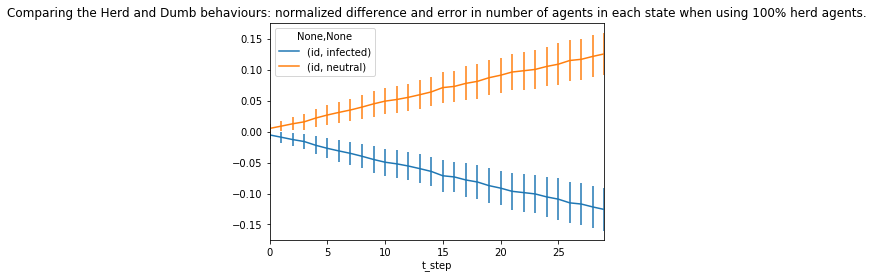

In [28]:
diff = evodumb['mean']-evoherd['mean']
m = evodumb['max'].loc[0].sum()
diff = diff / m
diff.plot(yerr=(evodumb['std']+evoherd['std'])/m,
          title='Comparing the Herd and Dumb behaviours: normalized difference and error in number of agents in each state when using 100% herd agents.');

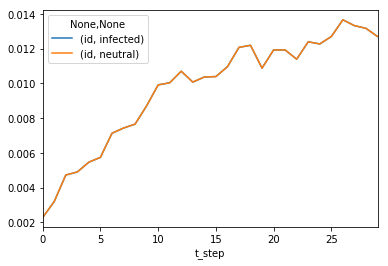

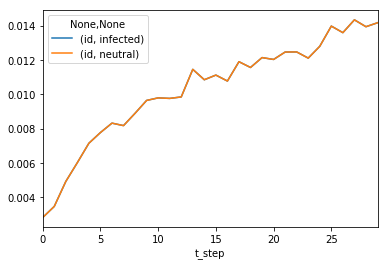

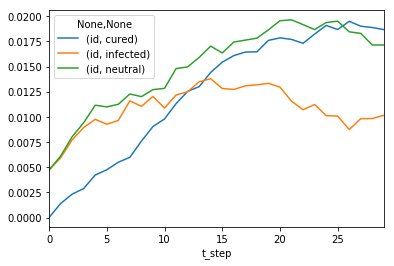

In [29]:
(evohalfherd['std']/m).plot()
(evodumb['std']/m).plot()
(evowise['std']/m).plot()